In [46]:
import h3
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString

# Your existing edge processing code...

edges = []
processed_edges = set()
counter = 0
total_hexagons = len(hexagons)

for hexagon in hexagons:
    counter += 1
    print(f"Przetwarzanie heksagonu {counter}/{total_hexagons}")
    # Pobierz bezpośrednich sąsiadów heksagonu
    neighbors = h3.hex_ring(hexagon, 1)
    for neighbor in neighbors:
        # Upewnij się, że sąsiad jest w naszym zbiorze heksagonów
        if neighbor in hexagons:
            # Utwórz unikalny klucz dla krawędzi, aby uniknąć duplikatów
            edge_key = frozenset([hexagon, neighbor])
            if edge_key not in processed_edges:
                processed_edges.add(edge_key)

                # Pobierz granice obu heksagonów
                hex_boundary = h3.h3_to_geo_boundary(hexagon, geo_json=True)
                neighbor_boundary = h3.h3_to_geo_boundary(neighbor, geo_json=True)

                # Znajdź wspólne wierzchołki (punkty) między heksagonami
                shared_coords = set(map(tuple, hex_boundary)) & set(map(tuple, neighbor_boundary))

                if len(shared_coords) >= 2:
                    # Posortuj wspólne punkty, aby utworzyć geometrię krawędzi
                    shared_coords = list(shared_coords)
                    edge_coords = [list(coord) for coord in shared_coords[:2]]  # Weź dwa punkty

                    # Dodaj dane krawędzi do listy
                    edges.append({
                        'from_hex': hexagon,
                        'to_hex': neighbor,
                        'geometry': LineString(edge_coords)  # Tworzymy LineString zamiast listy współrzędnych
                    })

# Convert to DataFrame
edges_df = pd.DataFrame(edges)

# Convert to GeoDataFrame
edges_gdf = gpd.GeoDataFrame(edges_df, geometry='geometry', crs="EPSG:4326")

# Display GeoDataFrame
print(edges_gdf)


Przetwarzanie heksagonu 1/24809
Przetwarzanie heksagonu 2/24809
Przetwarzanie heksagonu 3/24809
Przetwarzanie heksagonu 4/24809
Przetwarzanie heksagonu 5/24809
Przetwarzanie heksagonu 6/24809
Przetwarzanie heksagonu 7/24809
Przetwarzanie heksagonu 8/24809
Przetwarzanie heksagonu 9/24809
Przetwarzanie heksagonu 10/24809
Przetwarzanie heksagonu 11/24809
Przetwarzanie heksagonu 12/24809
Przetwarzanie heksagonu 13/24809
Przetwarzanie heksagonu 14/24809
Przetwarzanie heksagonu 15/24809
Przetwarzanie heksagonu 16/24809
Przetwarzanie heksagonu 17/24809
Przetwarzanie heksagonu 18/24809
Przetwarzanie heksagonu 19/24809
Przetwarzanie heksagonu 20/24809
Przetwarzanie heksagonu 21/24809
Przetwarzanie heksagonu 22/24809
Przetwarzanie heksagonu 23/24809
Przetwarzanie heksagonu 24/24809
Przetwarzanie heksagonu 25/24809
Przetwarzanie heksagonu 26/24809
Przetwarzanie heksagonu 27/24809
Przetwarzanie heksagonu 28/24809
Przetwarzanie heksagonu 29/24809
Przetwarzanie heksagonu 30/24809
Przetwarzanie heksa

<AxesSubplot:>

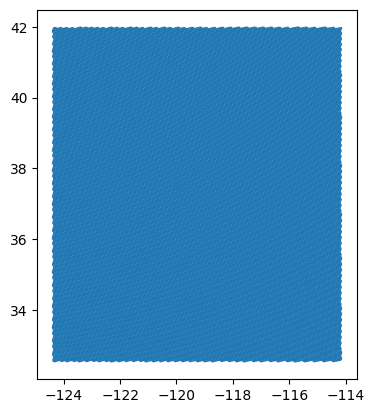

In [47]:
edges_gdf.plot()